**Part C** Identify the 
# Homework 2: Sediment Transport Practice

<span style="color: red;"> **Apologies for providing this very late - Dr.V** </span>

## How to prepare and submit your work

Please submit a PDF in bCourses to be graded.  That PDF is a short summary of the questions and answers.  You can put that summary together in word, evernote, onenote, etc.  Please do not submit a copy of the code below.  You can learn by working in a group, but please have your own personal notes in which you work out the answers.  This could be the jupyter notebook below, or a paper notebook, or other software like mathematica.  Please make your answers unique by using your own words, choosing the number of significant digits to show,  deciding for yourself which parts of the question to repeat, and deciding for yourself how much explanation and comments accompany your answers.

## Part 1 - Analytic Formulas for Integrated Sediment Transport

In this we will run the series of analytical formulas that roughly predict sediment transport in a river.  

### HW2 Q1


We will work with sand having density $\rho_s = 2650 \textsf{ kg/m}^3$ and average diameter $d_{sed} = 0.5 \times 10^{-3} \textsf{ m}$.

We will work with freshwater at 10 degrees Celsius, thus having density $\rho = 999.7 \textsf{ kg/m}^3$ and kinematic viscosity $\nu = 1.31 \times 10^{-6} \textsf{ m}^2\textsf{/s}$ (note that this is the molecular viscosity, not a turbulent or eddy viscosity).  If you work at a different temperature, use this convenient table https://docs.google.com/document/d/1TIn2O7C_UnqADeAQx2mAJqAECK5ci2TjjmGK0tIo6FE/
 
**Part A**: Calculate the  velocity that the sand would have if it were falling under Stokes-settling  conditions $w_{ss} \equiv g R d_{sed}^2/18\nu$, where $R \equiv (\rho_s-\rho)/\rho$.

**Part B**: The Stokes-settling conditions hold for $Re \lt 1$ because Stokes' solution assumes that the flow around the sediment is dominated by viscous transport of momentum.  Calculate $Re \equiv w_{ss}d_{sed}/\nu$.  Use it to check whether Stokes' settling is an accurate descrption of sediment's actual velocity or only a reference velocity.  

**Part C**: Calculate the Reynolds number that is commonly used in sediment transport literature, $Re_s \equiv 18Re$.  This is the value most likely to appear on the x-axis of the Shields curve.  Examine some Shields curves, finding them in the famous ASCE Manual 54, the more recent ASCE companion Manual 110, wikipedia, engineering toolbox, etc.  Explain briefly whether you prefer to use a Shields curve to find $\tau^\ast_c$ or use a constant value.  I have already shared my opinion, that I use a constant $\tau^\ast_c \approx 0.05$, but I'd appreciate hearing your opinion after examining some Shields curves. 



In [2]:
import numpy as np
g=9.81 #m/s
rho = 999.7 #kg/m3
nu = 1.31e-6 #m2/s
rho_s = 2650 #kg/m3
ds = 0.5e-3 #m

R=(rho_s-rho)/rho #dimensionless
print('R = '+str(np.round(R,2)))
w=g*R*ds*ds/(18*nu)
print('w = '+str(np.round(w,3))+' m/s')
Re=w*ds/nu
Re_s=18*Re
print('Re = '+str(Re))
print('Re_s = 18Re = '+str(Re_s))

R = 1.65
w = 0.172 m/s
Re = 65.53255965718101
Re_s = 18Re = 1179.586073829258


### HW2 Q2


We will work with a river having depth $h = 1 m$ and width $b = 30 m$.  For geometric simplicity we will assume that it has a rectangular cross-section.  The river flowrate (or discharge) is $Q = 60 m^3/s$.

**Part A**: Calculate the volume-averaged streamwise velocity $\overline{u}$.

**Part B**: Calculate the hydraulic radius $R_h$ and note that for broad rivers, it is roughly equal to the river depth.

**Part C**: Calculate the dimensional shear stress on the river bed using Manning's equation 

$$\tau_{bed} = \rho g \left(\overline{u}\right)^{2} R_h^{-1/3} (n/\alpha)^2$$.

Manning's roughness coefficient $n$ is dimensionless but comes with a dimensional correction factor $\alpha \equiv 1 m^{1/3}s^{-1} = 1.49 ft^{1/3}s^{-1}$.  You can see values for different riverbeds here: https://www.engineeringtoolbox.com/mannings-roughness-d_799.html.  For this homework, we will use $n = 0.02$.

In [3]:
h=1 #m
b=30 #m
n=0.02 #dimensionless but always has a coefficient with it
A=b*h #m^2
Q=60 #m^3/s
ubar = Q/A #m/s
print('average u = '+str(ubar)+' m/s')
Rh = A/(h+h+b)
print('R_h = '+str(Rh)+' m')
tau_bed=rho*g*ubar*ubar*n*n*(Rh**(-1/3))
print('tau_bed = '+str(tau_bed)+' N/m^2')

average u = 2.0 m/s
R_h = 0.9375 m
tau_bed = 16.03251260399194 N/m^2


### HW2 Q3


Express $\tau_{bed}$ in other ways.

**Part A**: Calculate the nondimensional shear stress $\tau^\ast \equiv \tau_{bed}/(\rho R g d_{sed})$.

**Part B**: Calculate the redimensionalized shear velocity $u^\ast \equiv \sqrt{\tau_{bed}/\rho}$.

**Part C**: Compare the shear velocity $u^\ast$ to the average river velocity $\overline{u}$.  In most rivers, the shear velocity is usually 5 to 10% of the average river velocity. 

In [4]:
taustar = tau_bed/(rho*R*g*ds)
print('Shields Parameter = '+str(taustar))
ustar = np.sqrt(tau_bed/rho)
print('Shear velocity = '+str(ustar)+' m/s')

Shields Parameter = 1.980613243332947
Shear velocity = 0.12663855574481367 m/s


### HW2 Q4


Use the Meyer-Peter Mueller formula to predict sediment transport.

**Part A**: Calculate the nondimensional sediment transport number or Einstein number $q_b^\ast \equiv 8(\tau^\ast-\tau^\ast_c)^{3/2}$.  State which value for $\tau^\ast_c$ you use.

**Part B**: Use the definition of the Einstein number to calculate a dimensional $q_b \equiv q_b^\ast \sqrt{g R d_{sed}^3}$.

**Part C**: Calculate the mass flowrate (units [kg/s]) $\dot{M}_{sed} \equiv q_b b \rho_s$. Compare this to the mass flowrate of water $\dot{M}_{water} \equiv Q \rho$.

In [5]:
qbstar = 8*((taustar-0.05)**(3/2))
qb = qbstar*np.sqrt(g*R*ds*ds*ds)
Mdot_sed = qb*b*rho_s
Mdot_water = Q*rho
print(Mdot_sed, Mdot_water)

76.7602094481385 59982.0


## Part 2 - Numerical Prediction of Individual Sediment Grains

In this section we will simulate the motion of one particle through a flow with velocity gradients.  These gradients are not the same as those found in a river's turbulent boundary layer, but they are still helpful for visualizing sediment motion.  The flow we will simulate is a modified Taylor-Green vortex.  

### HW2 Q5

Run the code below and examine the results.  

**Part A**: Does the flow decay with time or does it reach a steady state?

**Part B**: Are there regions in which you predict sediment could be trapped?

**Part C**: What are the units of velocity?

time = 0.02026833970057931
time = 3.3037393711944363
time = 6.627747082089457
time = 9.97202313268497


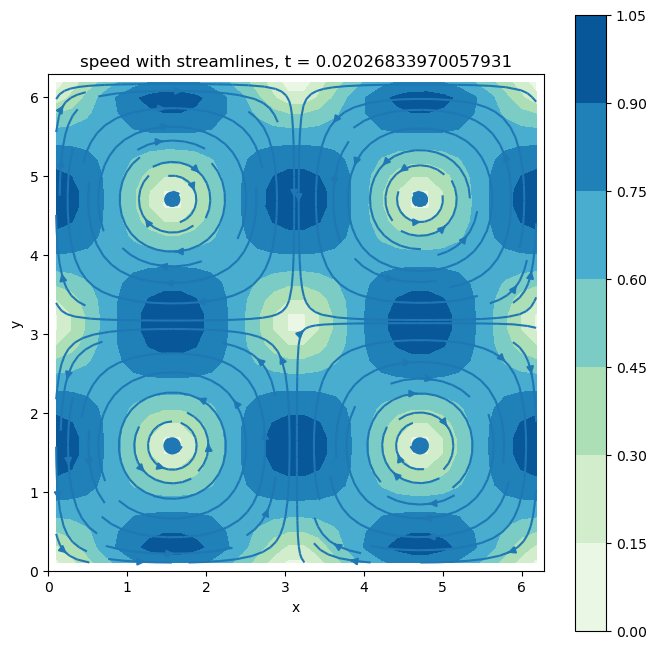

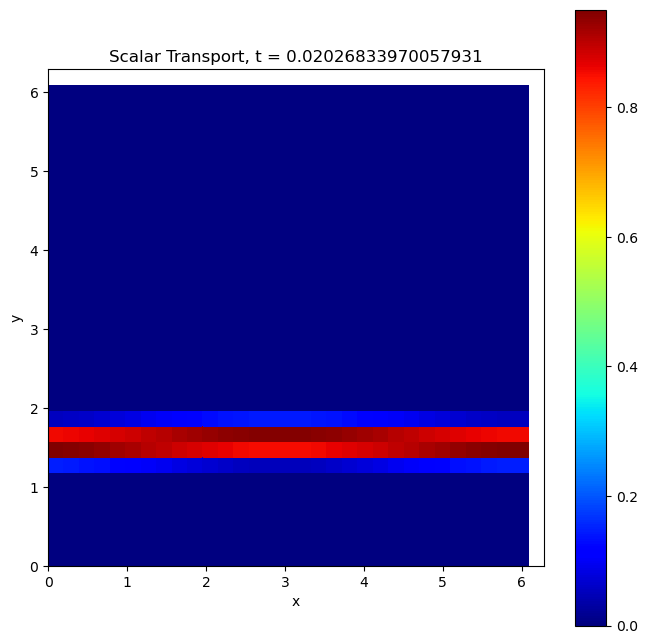

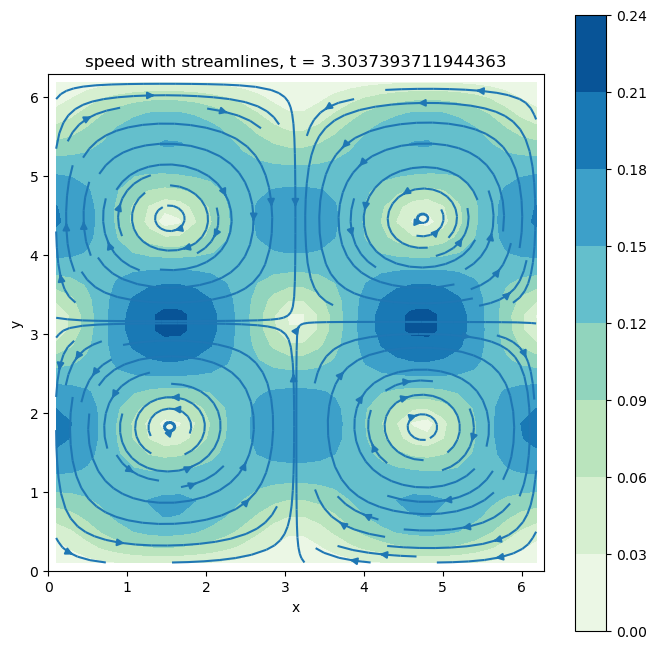

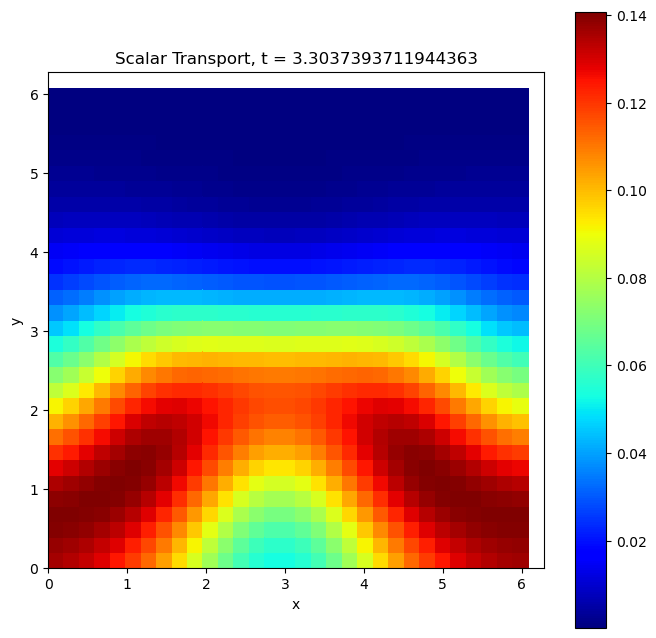

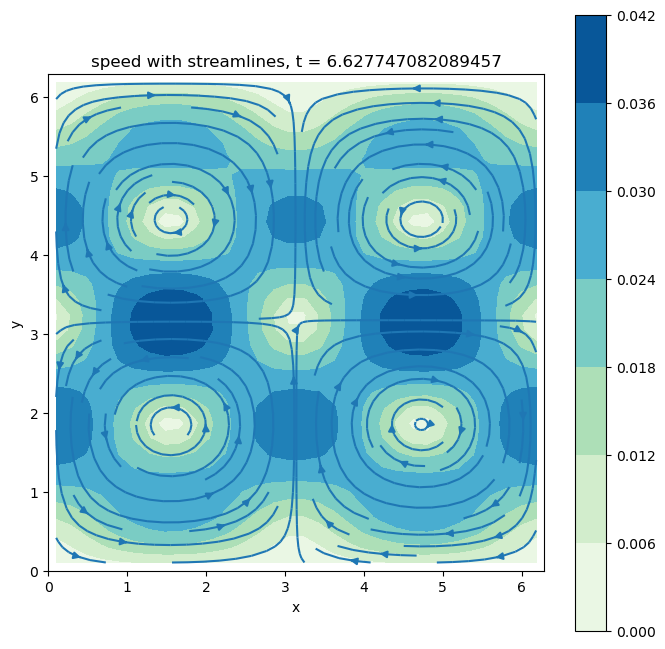

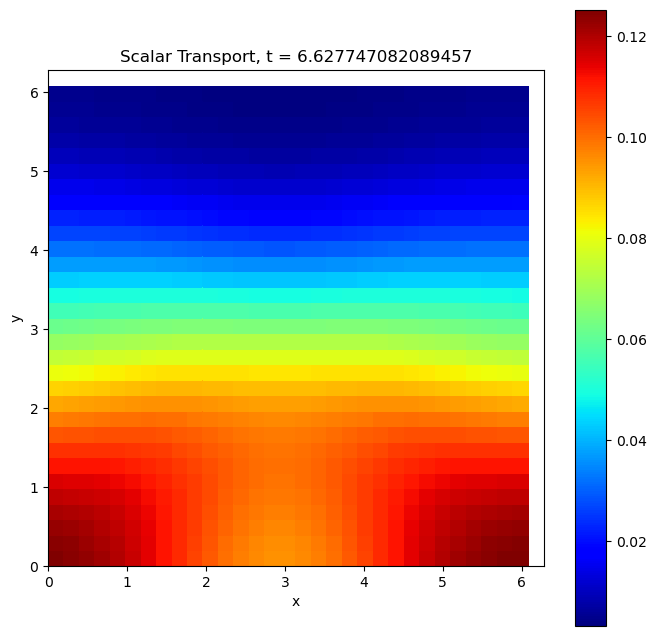

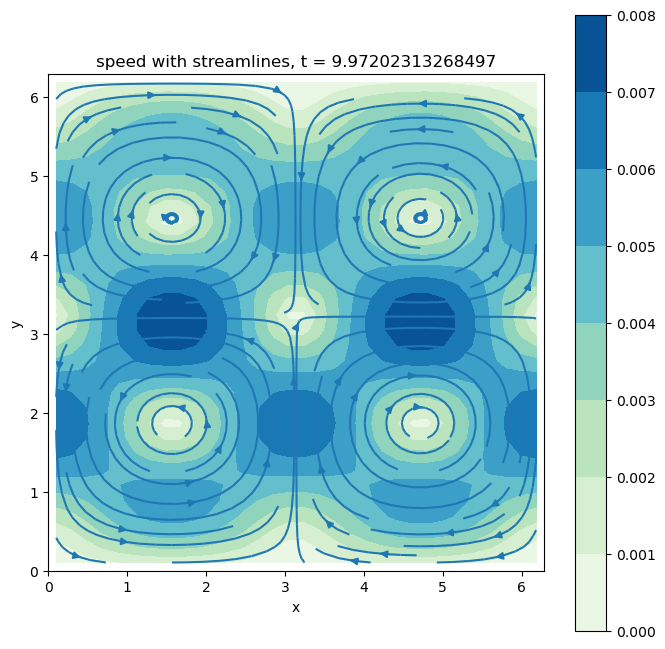

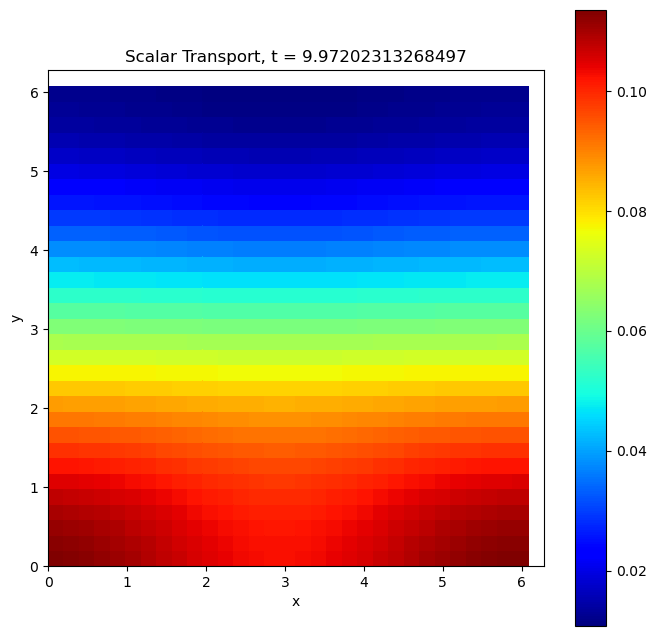

In [6]:
from BINS import BINS 
import numpy as np
# Set the parameters for the Taylor-Green vortex example
Nx = 32 # number of cells in x - note: 64 seems to run pretty slowly
Ny = 32  # number of cells in y - note: 64 seems to run pretty slowly
Lx = 2*np.pi #physical dimension in x
Ly = 2*np.pi #physical dimension in y
dx = Lx/(Nx-1) #step size in x
dy = Ly/(Ny-1) #step size in y
dt = min(dx,dy)/10; # timestep - important parameter for the code to work right
T = 10; # T = final time
nu = 0.2; #nu is restricted to a small range - if it gets too big or too small, Re or Pe reach bad extremes

# BC = boundary conditions (4x1 array: lowerX, GreaterX, LowerY, GreaterY)
# if BC is complex(0,1) = periodic boundary condition
# if BC is real number = fixed-speed boundary condition, at the speed of the real number, aligned with axis
BC = np.array([[complex(0,1),complex(0,1),0,0]])
#Note that the Taylor-Green vortex from 200A had periodic BC's, but 
#for this example zero-w boundaries are more like the case in a river

# IC_choice = choice of initial conditions defined in IC.m: Taylor-Green vortex is choice 3
IC_choice = 3;

# misc
PGx = 0 # pressure gradient in x
PGy = 0 # pressure gradient in y
IBM = 0 # IBM 0 = off, 1 = on
ng = 1 #number of ghost cells is part of the immersed boundary method (IBM)

#integrate the Navier-Stokes and continuity equations 
BINS(Nx,Ny,Lx,Ly,dt,T,BC,IC_choice,nu,ng,PGx,PGy,IBM)
#note that the velocity fields are saved at 4 times, in the file called "quarterly_arrays.npz"

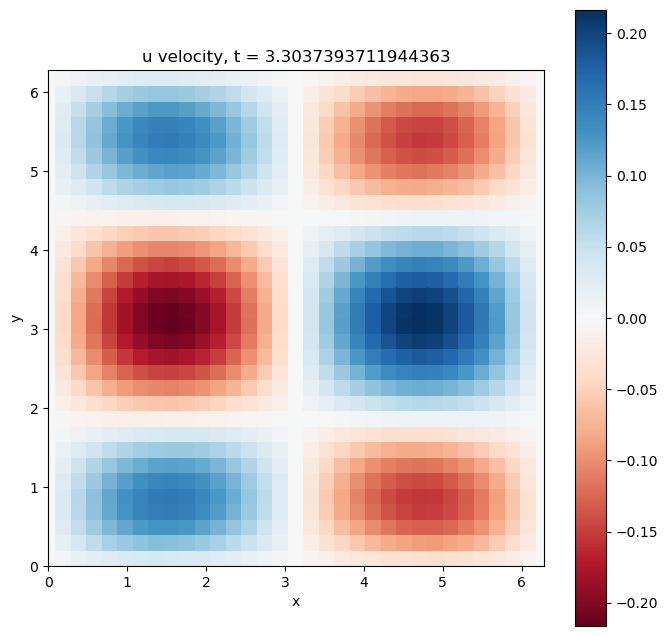

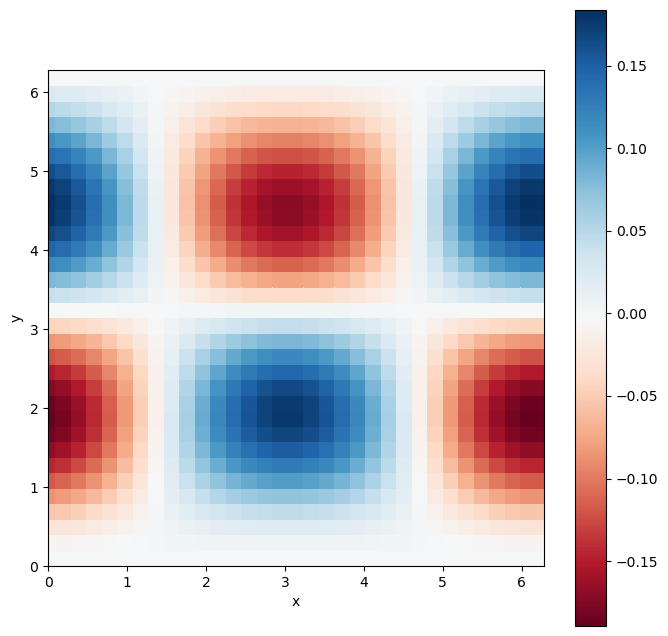

In [7]:
#load one of the four velocity fields
import matplotlib.pyplot as plt
loaded_arrays=np.load('quarterly_arrays.npz')
loaded_arrays.files
u=loaded_arrays['u1']
v=loaded_arrays['v1']
t=loaded_arrays['t1']

#plot the velocity field
ploton=1
if ploton==1:
        # setup the grid
        llx = ng + 1
        lly = ng + 1
        ulx = ng + Nx
        uly = ng + Ny
        xx = np.linspace(0,Lx,Nx+1) # grid of x faces
        yy = np.linspace(dy/2,Ly-dy/2,Ny)
        y,x = np.meshgrid(yy,xx)

        # plot u
        fig1, main_ax1 = plt.subplots()
        fig1.set_size_inches(8, 8)
        main_ax1.set_xlabel('x')
        main_ax1.set_ylabel('y')
        main_ax1.set_title('u velocity, t = ' + str(t))
        main_ax1.set_xlim(0, Lx)
        main_ax1.set_ylim(0, Ly)
        c = main_ax1.pcolor(x, y, u[llx-1:ulx+1,lly-1:uly], cmap='RdBu')
        fig1.colorbar(c, ax=main_ax1)
        main_ax1.set_aspect('equal')

        # plot v
        fig2, main_ax2 = plt.subplots()
        fig2.set_size_inches(8, 8)
        main_ax2.set_xlabel('x')
        main_ax2.set_ylabel('y')
        main_ax1.set_title('u velocity, t = ' + str(t))
        main_ax2.set_xlim(0, Lx)
        main_ax2.set_ylim(0, Ly)
        c = main_ax2.pcolor(x, y, v[llx-1:ulx+1,lly-1:uly], cmap='RdBu')
        fig2.colorbar(c, ax=main_ax2)
        main_ax2.set_aspect('equal')

### HW2 Q6 

The code below puts an example particle in the flow and tracks its motion through the flow.  

**Part A** Describe a place in the code where it makes a major assumption about how the flow varies in space or a major assumption about how the flow varies in time. 

**Part B** Identify the pickup function, examine its effects, and describe one of your observations.

**Part C** Explore the effects of the settling velocity.  Is there a value that prevents particles from getting stuck in the middle of the flow domain? 

**Part D** The Taylor-Green vortex provides the effect of dispersion.  Using different times from the simulation will allow you to explore the effect of stronger or weaker dispersion.  There is no question to answer here in part D. 


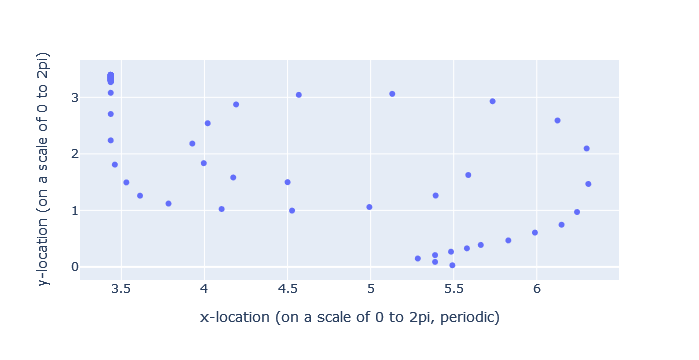

Error in atexit._run_exitfuncs:
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/popularity_contest/reporter.py", line 105, in report_popularity
    libraries = get_used_libraries(initial_modules, current_modules)
  File "/opt/conda/lib/python3.9/site-packages/popularity_contest/reporter.py", line 74, in get_used_libraries
    all_packages = get_all_packages()
  File "/opt/conda/lib/python3.9/site-packages/popularity_contest/reporter.py", line 51, in get_all_packages
    for f in dist.files:
TypeError: 'NoneType' object is not iterable


In [38]:
#settling particle, settling with vs
vs=.02
rng = np.random.default_rng()

nsteps=100
dtL = 3

tL=np.zeros((nsteps,),dtype = float)
xL=np.zeros((nsteps,),dtype = float)
yL=np.zeros((nsteps,),dtype = float)
xL[0]=4.5
yL[0]=1.5

for iL in range(nsteps-1):
    #current time: tL[iL]
    #current x-location: xL[iL]
    #index of closest x-location: xi
    #u-velocity at closest location on the velocity grid u[xi,yi], always evaluated at the time selected above
        
    tL[iL+1]=tL[iL]+dtL
    xdist = np.abs(xx-xL[iL]);
    xi=np.where(xdist==np.amin(xdist))
    ydist = np.abs(yy-yL[iL]);
    yi=np.where(ydist==np.amin(ydist))
    
    #advance location
    xL[iL+1]=xL[iL]+u[xi,yi]*dtL
    yL[iL+1]=max(yL[iL]+(v[xi,yi]*dtL)-(vs*dtL),0)

    if yL[iL+1]==0:
        yL[iL+1]=np.abs(rng.lognormal(.01))
     
import plotly.express as px
fig = px.scatter(x=xL,y=yL,labels=dict(x="x-location (on a scale of 0 to 2pi, periodic)", y="y-location (on a scale of 0 to 2pi)"))
fig.show()

## Reminders on submitting your work

Submit your answers to the 6 questions in a PDF on bCourses to be graded.  

